<a href="https://colab.research.google.com/github/telis5/Data/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практическая работа №2

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense

In [3]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

In [4]:
c * 1.8 + 32

array([-40. ,  14. ,  32. ,  46.4,  59. ,  71.6, 100.4])

In [5]:
model = keras.Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

In [6]:
history = model.fit(c, f, epochs=500, verbose=0)
print("Обучение завершено")

Обучение завершено


In [19]:
print(model.predict([100])[0][0], 100 * 1.8 + 32)
print(model.get_weights())

1/1 [==============================] - 0s 28ms/step
211.2801 212.0
[array([[1.8284928]], dtype=float32), array([28.430834], dtype=float32)]


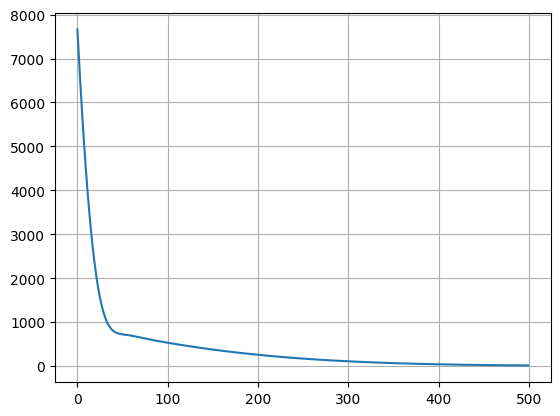

In [9]:
plt.plot(history.history['loss'])
plt.grid(True)

#Практическая работа №3

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image

In [21]:
model = keras.applications.VGG16()

553467096/553467096 [==============================] - 6s 0us/step


Saving var224.jpg to var224 (1).jpg


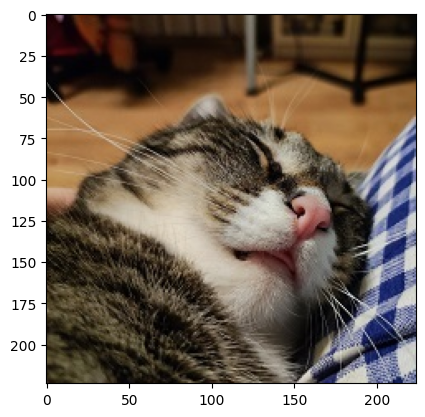

In [25]:
uploaded = files.upload()

img = Image.open(BytesIO(uploaded[list(uploaded.keys())[0]]))
plt.imshow( img )

In [26]:
# приводим к входному формату VGG-сети
img = np.array(img)
x = keras.applications.vgg16.preprocess_input(img)
print(x.shape)
x = np.expand_dims(x, axis=0)

(224, 224, 3)


In [79]:
# пропускаем через сеть
res = model.predict(x)
out = np.argmax(res)
print(out)

1/1 [==============================] - 0s 410ms/step
281


In [80]:
with open("/content/imagenet1000_clsidx_to_labels.txt") as f:
  idx2label = eval(f.read())

for idx in res[0].argsort()[::-1][:3]:
  print(idx, '-', idx2label[idx])

281 - tabby, tabby cat
285 - Egyptian cat
282 - tiger cat


Saving chi.jpg to chi.jpg


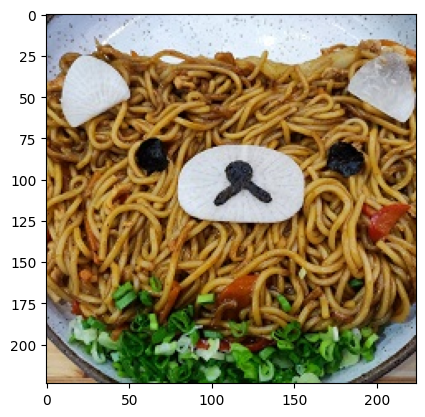

In [82]:
uploaded = files.upload()

img1 = Image.open(BytesIO(uploaded[list(uploaded.keys())[0]]))
plt.imshow(img1)

In [84]:
# приводим к входному формату VGG-сети
img = np.array(img1)
x = keras.applications.vgg16.preprocess_input(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
# пропускаем через сеть
res = model.predict(x)
# смотрим, что получилось
with open("/content/imagenet1000_clsidx_to_labels.txt") as f:
  idx2label = eval(f.read())

for idx in res[0].argsort()[::-1][:3]:
  print(idx, '-', idx2label[idx])

(224, 224, 3)
1/1 [==============================] - 0s 460ms/step
909 - wok
959 - carbonara
567 - frying pan, frypan, skillet


мда.. не обманешь.